# Décomposition en série de Fourier
Décomposition d'un signal $T_0$ préiodique sous la forme suivante : 
$$s(t) = A_0+\sum_{n=-\infty}^{\infty} c_n e^{2 j \pi n f_0 t}$$
Les éléments important de cette formule sont les $c_n$. Ils déterminent la fonction transformée. 


Source : https://www.youtube.com/watch?v=wrRMS6AeczA&ab_channel=VincentChoqueuse

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def synthesize(cn_array,n_array,f0,t):
    s=np.zeros(len(t),dtype=np.complex)
    for indice in range(len(n_array)):
        cn = cn_array[indice]
        n = n_array[indice]
        s = s + cn*np.exp(2j*n*np.pi*f0*t)
    return s

## Test de la fonction créé en construisant une fonction test : 

In [3]:
f0 = 1 
t = np.arange(0,2,0.001)
#cn_array = [1,1,1,1,1]
#n_array = [-2,-1,0,1,2]
#s = synthesize(cn_array,n_array,f0,t)
#print(s)

## Exemple de signal : 
Soit $s(t)$ le signal de période $T_0$ : 

    $s(t) = A$ si $ 0 \leq t < T_0/2$
    $s(t) = 0$ si $ T_0/2 < t \leq T_0/2$
Signal carré de période $T_0$ valant $A$ ou $0$. 

Pour la transformé de Fourier on doit calculer $c_0$ et les $c_n$.

$c_0 = A/2$

$c_n = -jA/\pi n$ pour $n$ impair et $0$ sinon. 

## Synthèse du signal

In [4]:
def compute_coef(A,n_array):
    cn_array = np.zeros(len(n_array), dtype=np.complex)
    for indice in range(len(n_array)): 
        n = n_array[indice]
        if n == 0 : 
            cn_array[indice] = A/2
        else : cn_array[indice] = (-1j*A/(np.pi*n))*(n%2)
    return cn_array

Text(0.5, 0, 'Temps en secondes')

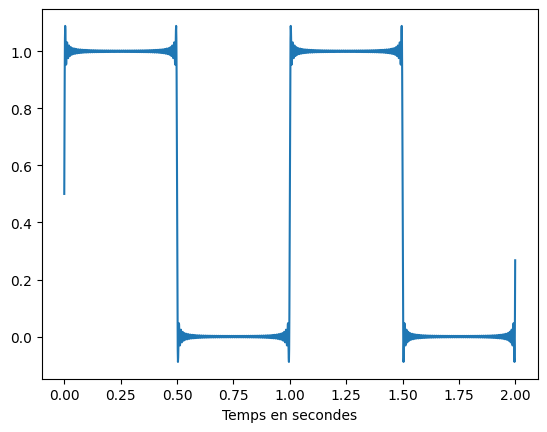

In [5]:
L = 120
n_array = np.arange(-L,L+1)
cn_array = compute_coef(1,n_array)
s = synthesize(cn_array,n_array,f0,t)
plt.plot(t,np.real(s))
plt.xlabel("Temps en secondes")

# Représentation spectrale
## Spectre d'amplitude

Text(0.5, 0, 'Fréquence en Hz')

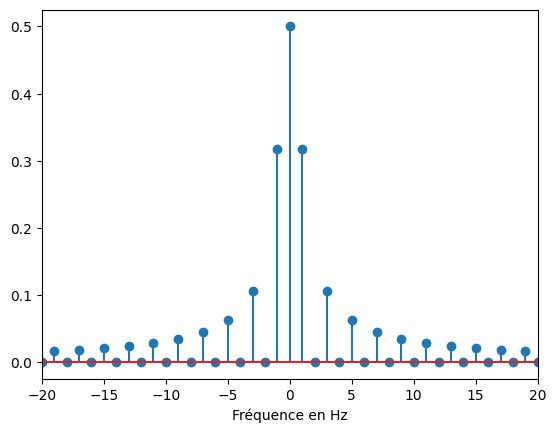

In [9]:
plt.stem(n_array,np.abs(cn_array),use_line_collection=True)
plt.xlim([-20,20])
plt.xlabel("Fréquence en Hz")

## Spectre de phase

Text(0.5, 0, 'Fréquence en Hz')

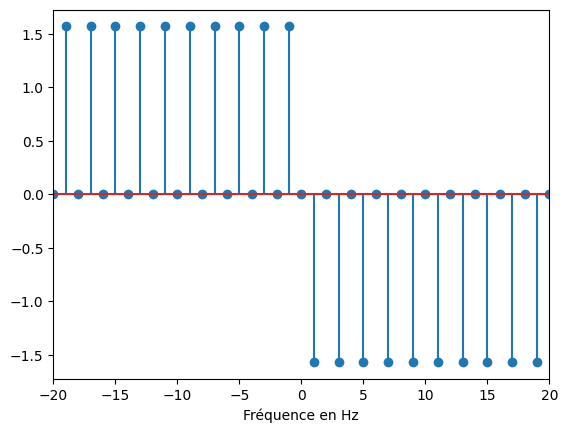

In [11]:
plt.stem(n_array,np.angle(cn_array)*(np.abs(cn_array)>0.0000001),use_line_collection=True)
plt.xlim([-20,20])
plt.xlabel("Fréquence en Hz")